In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pwd

'/Users/tarapongsrisongkram/OneDrive - Khon Kaen University (1)/Amylase inhibitor/Python'

In [3]:
df = pd.read_csv('df_clean_class.csv', index_col='Name_Short')
df['Bioactivity_class_number'] = df['Bioactivity_class'].map({'active_both': 3, 'active_glucosidase': 2, 'active_amylase': 1, 'inactive': 0})
df['Bioactivity_class_amylase_number'] = df['Bioactivity_class_amylase'].map({'active': 1, 'inactive': 0})
df['Bioactivity_class_glucosidase_number'] = df['Bioactivity_class_glucosidase'].map({'active': 1, 'inactive': 0})
df.head()

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class,Bioactivity_class_number,Bioactivity_class_amylase_number,Bioactivity_class_glucosidase_number
Name_Short,,,,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both,3,1,1
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both,3,1,1
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0,active_both,3,1,1
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5,active_glucosidase,2,0,1
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0,active_amylase,1,1,0


In [4]:
indices = df.index

In [5]:
plant_df = df.copy()
x = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]

In [6]:
# Glucosidase

In [7]:
y=df['Bioactivity_class_glucosidase'].astype("category").cat.codes

In [8]:
y.head()

Name_Short
G_cowa              0
P_debilis           0
P_evecta_leaf       0
P_evecta_Rhizome    0
E_cuneatum          1
dtype: int8

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Shuffle the indices for the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=False)

kNN  0.624 (0.181)
NB   0.281 (0.218)
SVC  0.657 (0.200)
RF   0.690 (0.260)
DT   0.562 (0.235)
PLS  -0.114 (0.629)


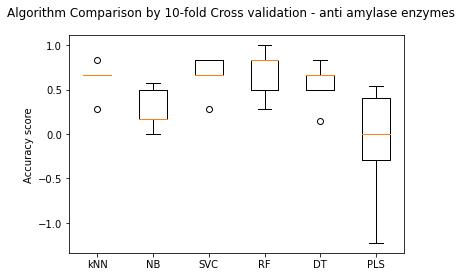

In [10]:
models = []
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier(max_depth=5,random_state=42)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('PLS', PLSRegression(n_components=2)))
results = []
names = []
for name, model in models:
    cvs = cross_val_score(model, x, y, cv=kf)
    results.append(cvs)
    names.append(name)
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std()))
fig = plt.figure()
fig.suptitle('Algorithm Comparison by 10-fold Cross validation - anti amylase enzymes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy score')
plt.savefig('Amylase_CV_5 model.pdf', dpi=500, bbox_inches='tight')
plt.show()   

In [11]:
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)
model_RF.fit(x, y)
# Evaluate the model's accuracy


cvs = cross_val_score(model_RF, x, y, cv=kf)

print('===================================')
print("For Random Forest model:")
print("Train set accuracy = " + str(model_RF.score(x, y)))
print('===================================')
print(f' CV accuracy is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')
print("\nImportance of each feature:\n", model_RF.feature_importances_)

For Random Forest model:
Train set accuracy = 1.0
 CV accuracy is 0.6904761904761905
sd CV is 0.2595128874940707

Importance of each feature:
 [0.11233031 0.04978027 0.00193495 0.24821575 0.10417862 0.24590678
 0.15895664 0.07869669]


In [12]:
feature_scores = pd.Series(model_RF.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

flavonoids         0.248216
Saponins           0.245907
Tannins            0.158957
Alkaloids          0.112330
Reducing_sugars    0.104179
Xanthones          0.078697
Antaquinones       0.049780
Carotenoids        0.001935
dtype: float64

In [13]:
x_selected = x[['flavonoids', 'Saponins']]
model_RF.fit(x_selected, y)
# Evaluate the model's accuracy


cvs = cross_val_score(model_RF, x_selected, y, cv=kf)

print('===================================')
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(x_selected, y)))
print('===================================')
print(f' CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

For Random Forest model:
Train set accuracy select = 0.9354838709677419
 CV accuracy select is 0.6238095238095237
sd CV is 0.18095238095238095


No handles with labels found to put in legend.


Accuracy score
For Random Forest model:
Train set accuracy select = 0.9354838709677419
CV accuracy select is 0.6238095238095237
sd CV is 0.18095238095238095


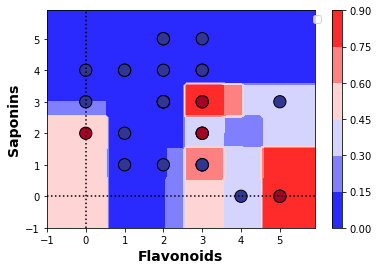

In [14]:
# generate dataset
X = x_selected
y = y
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# model
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

# fit the model
model_RF.fit(X, y)
# make predictions for the grid
yhat = model_RF.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='bwr')
# add a legend, called a color bar
plt.colorbar(c)


# Evaluate the model's accuracy

cvs = cross_val_score(model_RF, X, y, cv=kf)
print('===================================')
print("Accuracy score")
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

# create scatter plot for samples from each class
# create scatter of these samples
plt.scatter(X['flavonoids'], X['Saponins'], cmap='RdYlBu', s=150, label='', c=y, edgecolors='black')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlabel('Flavonoids', weight='bold', fontsize=14)
plt.ylabel('Saponins', weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1))

In [15]:
df_PCA = pd.read_csv('df_pca_PC.csv', index_col='Unnamed: 0')
df_PCA = df_PCA.rename(columns={' ' : 'Name'})
df_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Bioactivity_class
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,0.586112,active,active,active_both
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,0.712830,active,active,active_both
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,-1.181858,active,active,active_both
P_evecta_Rhizome,5.553863,-2.494154,1.899712,-0.839114,0.751199,-0.080271,inactive,active,active_glucosidase
E_cuneatum,0.230586,2.275222,-0.272833,0.988605,0.264548,-1.350849,active,inactive,active_amylase
P_anamense,1.791691,1.447887,-1.589100,-0.888612,1.086445,0.040024,inactive,active,active_glucosidase
A_marginata,-1.510425,0.007190,-0.913622,1.359107,0.715027,-1.118767,inactive,inactive,inactive
E_cherrevensis,1.295097,3.204121,1.245042,-0.889576,-1.566359,0.131278,active,inactive,active_amylase
F_indica,2.321658,1.148881,-1.691600,-0.244665,0.732347,0.324237,active,inactive,active_amylase
H_perforata,0.123734,1.657102,0.800794,-0.622572,-1.214582,0.278759,inactive,inactive,inactive


In [16]:
PCA = df_PCA.copy()
x_PCA = PCA[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
y_PCA=df_PCA['Bioactivity_class_glucosidase'].astype("category").cat.codes

kNN  0.624 (0.181)
NB   0.595 (0.258)
SVC  0.657 (0.200)
RF   0.590 (0.185)
DT   0.681 (0.171)
PLS  -0.287 (0.791)


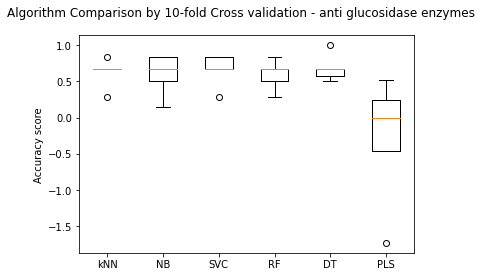

In [17]:
models = []
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier(max_depth=5,random_state=42)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('PLS', PLSRegression(n_components=2)))
results = []
names = []
for name, model in models:
    cvs = cross_val_score(model, x_PCA, y_PCA, cv=kf)
    results.append(cvs)
    names.append(name)
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std()))
fig = plt.figure()
fig.suptitle('Algorithm Comparison by 10-fold Cross validation - anti glucosidase enzymes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy score')
plt.savefig('Glucosidase_CV_5 model.pdf', dpi=500, bbox_inches='tight')
plt.show()   

In [18]:
model_SVM = SVC(kernel='rbf',probability=True,random_state=42)
model_SVM.fit(x_PCA, y_PCA)
# Evaluate the model's accuracy
cvs = cross_val_score(model_RF, x_PCA, y_PCA, cv=kf)
print('===================================')
print("For SVM model:")
print("Train set accuracy = " + str(model_SVM.score(x_PCA, y_PCA)))
print('===================================')
print(f' CV accuracy is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

For SVM model:
Train set accuracy = 0.8387096774193549
 CV accuracy is 0.5904761904761904
sd CV is 0.18528644246041637


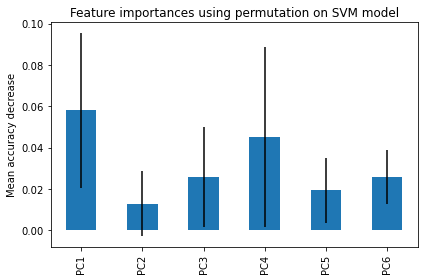

In [19]:
#Features
from sklearn.inspection import permutation_importance
result = permutation_importance(model_SVM, x_PCA, y_PCA, random_state=42)
feature_names = x_PCA.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on SVM model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [20]:
Bioactivity_class = df_PCA['Bioactivity_class_glucosidase']
label1 = df_PCA[Bioactivity_class == 'active']
label2 = df_PCA[Bioactivity_class == 'inactive']

Accuracy score
For Support vector model:
Train set accuracy select = 0.8064516129032258
CV accuracy select is 0.7238095238095238
sd CV is 0.24309045748762323


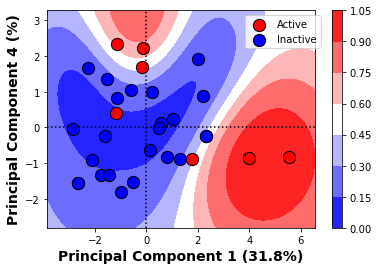

In [21]:
from sklearn import svm
x_PCA_selected = x_PCA[['PC1', 'PC4']]
#SVC
X = x_PCA_selected
y = y_PCA
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# Linear SVM model
model_SVM = SVC(kernel='rbf',probability=True,random_state=42)
# fit the model
model_SVM.fit(X, y)
# make predictions for the grid
yhat = model_SVM.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='bwr')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
#for class_value in range(2):
# get row indexes for samples with this class
#row_ix = np.where(y == class_value)

#Accuracy score
cvs = cross_val_score(model_SVM, X, y, cv=kf)
print('===================================')
print('Accuracy score')
print("For Support vector model:")
print("Train set accuracy select = " + str(model_SVM.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

# create scatter of these samples
#plt.scatter(X['PC1'], X['PC5'], cmap='RdYlBu', s=150, label='Active', c=y, edgecolors='black')
plt.scatter(label1['PC1'], label1['PC4'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
plt.scatter(label2['PC1'], label2['PC4'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlabel('Principal Component 1 (31.8%)', weight='bold', fontsize=14)
plt.ylabel('Principal Component 4 (%)', weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1))

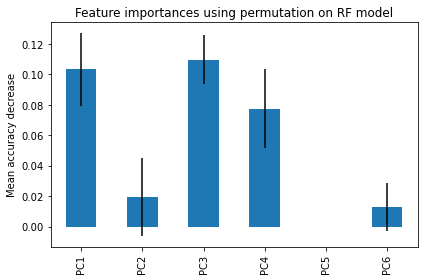

In [22]:
#Features
from sklearn.inspection import permutation_importance
model_RF.fit(x_PCA , y_PCA)
result = permutation_importance(model_RF, x_PCA, y_PCA, random_state=42)
feature_names = x_PCA.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on RF model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [23]:
model_RF.fit(x_PCA , y_PCA)
# Evaluate the model's accuracy
cvs = cross_val_score(model_RF, x_PCA, y_PCA, cv=kf)
print('===================================')
print("For Random Forest model:")
print("Train set accuracy = " + str(model_RF.score(x_PCA, y_PCA)))
print('===================================')
print(f' CV accuracy is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')
feature_scores = pd.Series(model_RF.feature_importances_, index=x_PCA.columns).sort_values(ascending=False)
feature_scores

For Random Forest model:
Train set accuracy = 1.0
 CV accuracy is 0.5904761904761904
sd CV is 0.18528644246041637


PC3    0.236797
PC4    0.192403
PC1    0.188638
PC2    0.165531
PC5    0.121581
PC6    0.095050
dtype: float64

Accuracy score
For Random Forest model:
Train set accuracy select = 1.0
CV accuracy select is 0.6523809523809524
sd CV is 0.1667346800001105


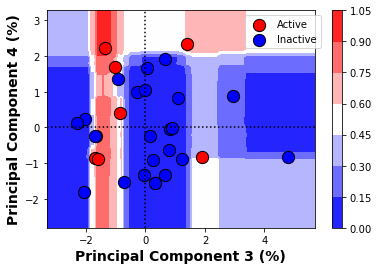

In [24]:
x_PCA_selected = x_PCA[['PC3', 'PC4']]
model_RF.fit(x_PCA_selected, y_PCA)
# generate dataset
X = x_PCA_selected
y = y_PCA
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# model
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

# fit the model
model_RF.fit(X, y)
# make predictions for the grid
yhat = model_RF.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='bwr')
# add a legend, called a color bar
plt.colorbar(c)


# Evaluate the model's accuracy

cvs = cross_val_score(model_RF, x_PCA_selected, y_PCA, cv=kf)
print('===================================')
print("Accuracy score")
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

# create scatter plot for samples from each class
# create scatter of these samples
plt.scatter(label1['PC3'], label1['PC4'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
plt.scatter(label2['PC3'], label2['PC4'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlabel('Principal Component 3 (%)', weight='bold', fontsize=14)
plt.ylabel('Principal Component 4 (%)', weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

Accuracy score
For Random Forest model:
Train set accuracy select = 1.0
CV accuracy select is 0.6238095238095238
sd CV is 0.23444825952554613


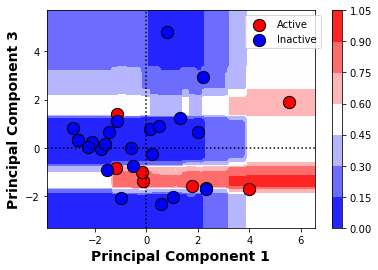

In [25]:
x_PCA_selected = x_PCA[['PC1', 'PC3']]
model_RF.fit(x_PCA_selected, y_PCA)
# generate dataset
X = x_PCA_selected
y = y_PCA
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# model
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

# fit the model
model_RF.fit(X, y)
# make predictions for the grid
yhat = model_RF.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='bwr')
# add a legend, called a color bar
plt.colorbar(c)


# Evaluate the model's accuracy

cvs = cross_val_score(model_RF, x_PCA_selected, y_PCA, cv=kf)
print('===================================')
print("Accuracy score")
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

# create scatter plot for samples from each class
# create scatter of these samples
plt.scatter(label1['PC1'], label1['PC3'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
plt.scatter(label2['PC1'], label2['PC3'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlabel('Principal Component 1', weight='bold', fontsize=14)
plt.ylabel('Principal Component 3', weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

In [26]:
model_KN = KNeighborsClassifier(n_neighbors=2)
model_KN.fit(x_PCA , y_PCA)
# Evaluate the model's accuracy
cvs = cross_val_score(model_KN, x_PCA, y_PCA, cv=kf)
print('===================================')
print("For Random Forest model:")
print("Train set accuracy = " + str(model_KN.score(x_PCA, y_PCA)))
print('===================================')
print(f' CV accuracy is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

For Random Forest model:
Train set accuracy = 0.8709677419354839
 CV accuracy is 0.6428571428571428
sd CV is 0.07377111135633174


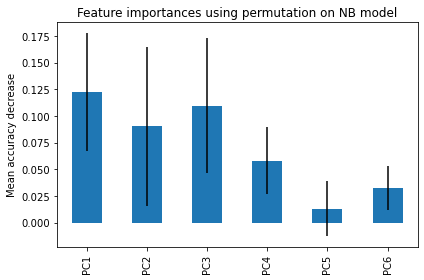

In [27]:
#Features
from sklearn.inspection import permutation_importance
model_KN.fit(x_PCA , y_PCA)
result = permutation_importance(model_KN, x_PCA, y_PCA, random_state=42)
feature_names = x_PCA.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on NB model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Accuracy score
For Support vector model:
Train set accuracy select = 0.7741935483870968
CV accuracy select is 0.6238095238095238
sd CV is 0.2094155564504383


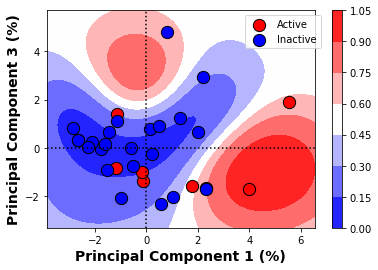

In [28]:
#NB
x_PCA_selected = x_PCA[['PC1', 'PC3']]
X = x_PCA_selected
y = y_PCA
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# Linear SVM model
model_KN = KNeighborsClassifier(n_neighbors=2)
# fit the model
model_KN.fit(X, y)
# make predictions for the grid
yhat = model_SVM.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='bwr')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
#for class_value in range(2):
# get row indexes for samples with this class
#row_ix = np.where(y == class_value)

#Accuracy score
cvs = cross_val_score(model_SVM, X, y, cv=kf)
print('===================================')
print('Accuracy score')
print("For Support vector model:")
print("Train set accuracy select = " + str(model_SVM.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

# create scatter of these samples
#plt.scatter(X['PC1'], X['PC5'], cmap='RdYlBu', s=150, label='Active', c=y, edgecolors='black')
plt.scatter(label1['PC1'], label1['PC3'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
plt.scatter(label2['PC1'], label2['PC3'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlabel('Principal Component 1 (%)', weight='bold', fontsize=14)
plt.ylabel('Principal Component 3 (%)', weight='bold', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1))

In [29]:
X.shape

(31, 2)

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, model_RF.predict_proba(X)[:, 1])

1.0

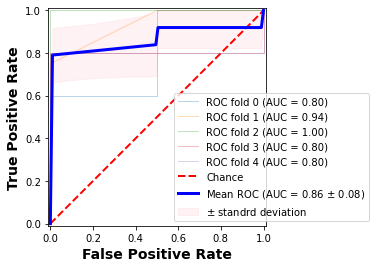

In [31]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
x_PCA_selected = x_PCA[['PC3', 'PC4']]
# generate dataset
X = x_PCA_selected
y = y_PCA
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=1)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=3, alpha=1)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='pink', alpha=.2,
                 label=r'$\pm$ standrd deviation')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14, weight='bold')
plt.ylabel('True Positive Rate',fontsize=14, weight='bold')
#plt.title(r'5 fold Cross-Validation ROC of $\alpha$ amylase inhibitor',fontsize=14, weight='bold')
plt.legend(bbox_to_anchor=(1.5,0), loc="lower right", prop={'size': 10})
plt.show()

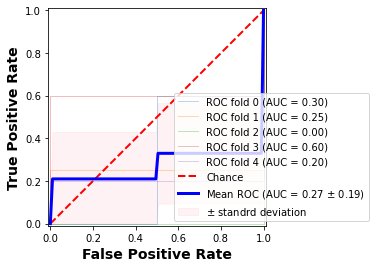

In [32]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = SVC(kernel='rbf',probability=True,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=1)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=3, alpha=1)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='pink', alpha=.2,
                 label=r'$\pm$ standrd deviation')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=14, weight='bold')
plt.ylabel('True Positive Rate',fontsize=14, weight='bold')
#plt.title(r'5 fold Cross-Validation ROC of $\alpha$ amylase inhibitor',fontsize=14, weight='bold')
plt.legend(bbox_to_anchor=(1.5,0), loc="lower right", prop={'size': 10})
plt.show()

Accuracy score
For Random Forest model:
Train set accuracy select = 1.0
CV accuracy select is 0.6523809523809524
sd CV is 0.1667346800001105


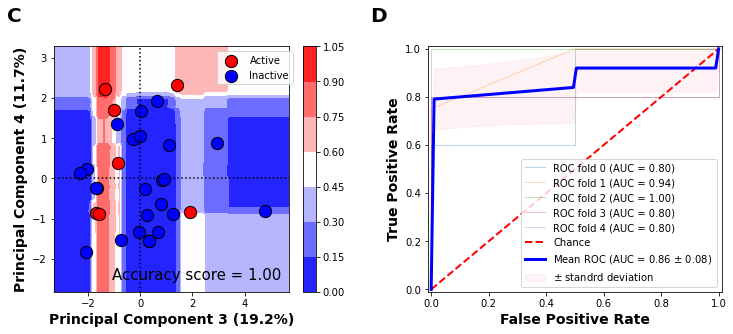

In [33]:
#plot

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics





fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.tight_layout(w_pad=5, h_pad=5)

texts = ['C', 'D']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')
    


x_PCA_selected = x_PCA[['PC3', 'PC4']]
model_RF.fit(x_PCA_selected, y_PCA)
# generate dataset
X = x_PCA_selected
y = y_PCA
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# model
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

# fit the model
model_RF.fit(X, y)
# make predictions for the grid
yhat = model_RF.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = ax[0].contourf(xx, yy, zz, cmap='bwr')
# add a legend, called a color bar
fig.colorbar(c, ax=ax[0])


# Evaluate the model's accuracy

cvs = cross_val_score(model_RF, x_PCA_selected, y_PCA, cv=kf)
print('===================================')
print("Accuracy score")
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

# create scatter plot for samples from each class
# create scatter of these samples
ax[0].scatter(label1['PC3'], label1['PC4'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
ax[0].scatter(label2['PC3'], label2['PC4'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')
ax[0].axvline(0, c='black', ls=':')
ax[0].axhline(0, c='black', ls=':')
ax[0].set_xlabel('Principal Component 3 (19.2%)', weight='bold', fontsize=14)
ax[0].set_ylabel('Principal Component 4 (11.7%)', weight='bold', fontsize=14)
ax[0].legend(bbox_to_anchor=(1.04,1))
ax[0].text(xx.max() - .3, yy.min() + .3, ('Accuracy score = %.2f' % model_RF.score(X, y)).lstrip('0'),
                size=15, horizontalalignment='right')


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax[1].plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=1)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax[1].plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=3, alpha=1)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax[1].fill_between(mean_fpr, tprs_lower, tprs_upper, color='pink', alpha=.2,
                 label=r'$\pm$ standrd deviation')
ax[1].set_xlim([-0.01, 1.01])
ax[1].set_ylim([-0.01, 1.01])
ax[1].set_xlabel('False Positive Rate',fontsize=14, weight='bold')
ax[1].set_ylabel('True Positive Rate',fontsize=14, weight='bold')
#plt.title(r'5 fold Cross-Validation ROC of $\alpha$ amylase inhibitor',fontsize=14, weight='bold')
ax[1].legend(bbox_to_anchor=(1.0,0), loc="lower right", prop={'size': 10})


plt.savefig('RF_glucosidase.pdf', dpi=500, bbox_inches='tight')
plt.show()

In [34]:
df_pca_loading = pd.read_csv('df_pca_loading.csv', index_col='Unnamed: 0')
df_pca_loading

,PC1,PC2,PC3,PC4,PC5,PC6
Alkaloids,0.580337,0.756010,0.213596,-0.123501,-0.150160,-0.077361
Antaquinones,0.019162,0.012549,-0.023172,-0.005502,0.024059,0.017883
Carotenoids,0.010689,0.034999,0.017055,-0.020003,-0.051457,0.007241
flavonoids,0.365101,-0.384646,-0.297454,-0.425605,-0.285448,-0.606294
Reducing_sugars,0.410541,-0.078883,-0.458896,-0.304851,0.533463,0.484655
Saponins,-0.510805,0.311556,0.079328,-0.649448,0.378156,-0.266329
Tannins,0.035617,0.206040,-0.357876,0.537059,0.493043,-0.543203
Xanthones,0.314158,-0.365200,0.721191,0.005296,0.471241,-0.158620


In [35]:
loading1 = df_pca_loading.loc[df_pca_loading.index == 'Alkaloids']
loading2 = df_pca_loading.loc[df_pca_loading.index == 'Antaquinones']
loading3 = df_pca_loading.loc[df_pca_loading.index == 'Carotenoids']
loading4 = df_pca_loading.loc[df_pca_loading.index == 'flavonoids']
loading5 = df_pca_loading.loc[df_pca_loading.index == 'Reducing_sugars']
loading6 = df_pca_loading.loc[df_pca_loading.index == 'Saponins']
loading7 = df_pca_loading.loc[df_pca_loading.index == 'Tannins']
loading8 = df_pca_loading.loc[df_pca_loading.index == 'Xanthones']

Accuracy score
For Random Forest model:
Train set accuracy select = 1.0
CV accuracy select is 0.6523809523809524
sd CV is 0.1667346800001105


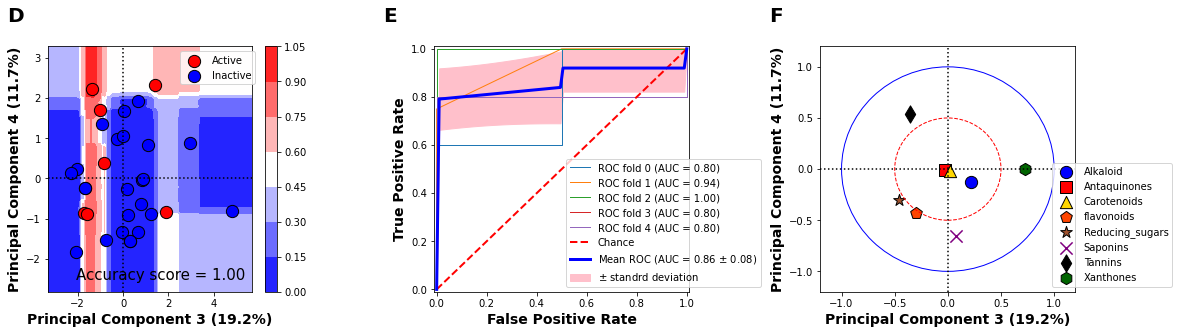

In [37]:
##### plot

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics





fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
fig.tight_layout(w_pad=10, h_pad=5)

texts = ['D', 'E', 'F']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.2, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')
    


x_PCA_selected = x_PCA[['PC3', 'PC4']]
model_RF.fit(x_PCA_selected, y_PCA)
# generate dataset
X = x_PCA_selected
y = y_PCA
# define bounds of the domain
min1, max1 = X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1
min2, max2 = X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# model
model_RF = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

# fit the model
model_RF.fit(X, y)
# make predictions for the grid
yhat = model_RF.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = ax[0].contourf(xx, yy, zz, cmap='bwr')
# add a legend, called a color bar
fig.colorbar(c, ax=ax[0])


# Evaluate the model's accuracy

cvs = cross_val_score(model_RF, x_PCA_selected, y_PCA, cv=kf)
print('===================================')
print("Accuracy score")
print("For Random Forest model:")
print("Train set accuracy select = " + str(model_RF.score(X, y)))
print('===================================')
print(f'CV accuracy select is {cvs.mean()}')
print(f'sd CV is {cvs.std()}')
print('===================================')

# create scatter plot for samples from each class
# create scatter of these samples
ax[0].scatter(label1['PC3'], label1['PC4'], cmap='RdYlBu', s=150, label='Active', c='#FF0000', edgecolors='black')
ax[0].scatter(label2['PC3'], label2['PC4'], cmap='RdYlBu', s=150, label='Inactive',c='#0000FF', edgecolors='black')
ax[0].axvline(0, c='black', ls=':')
ax[0].axhline(0, c='black', ls=':')
ax[0].set_xlabel('Principal Component 3 (19.2%)', weight='bold', fontsize=14)
ax[0].set_ylabel('Principal Component 4 (11.7%)', weight='bold', fontsize=14)
ax[0].legend(bbox_to_anchor=(1.04,1))
ax[0].text(xx.max() - .3, yy.min() + .3, ('Accuracy score = %.2f' % model_RF.score(X, y)).lstrip('0'),
                size=15, horizontalalignment='right')


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax[1].plot(fpr, tpr, lw=1, alpha=1,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=1)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax[1].plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=3, alpha=1)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax[1].fill_between(mean_fpr, tprs_lower, tprs_upper, color='pink', alpha=1,
                 label=r'$\pm$ standrd deviation')
ax[1].set_xlim([-0.01, 1.01])
ax[1].set_ylim([-0.01, 1.01])
ax[1].set_xlabel('False Positive Rate',fontsize=14, weight='bold')
ax[1].set_ylabel('True Positive Rate',fontsize=14, weight='bold')
#plt.title(r'5 fold Cross-Validation ROC of $\alpha$ amylase inhibitor',fontsize=14, weight='bold')
ax[1].legend(bbox_to_anchor=(1.3,0), loc="lower right", prop={'size': 10})


ax[2].axvline(0, c='black', ls=':')
ax[2].axhline(0, c='black', ls=':')
ax[2].set_xlim(-1.2,1.2)
ax[2].set_ylim(-1.2,1.2)
ax[2].set_xlabel('Principal Component 3 (19.2%)', weight='bold', fontsize=14)
ax[2].set_ylabel('Principal Component 4 (11.7%)', weight='bold', fontsize=14)
ax[2].scatter(loading1['PC3'] , loading1['PC4'] , color = 'blue', label='Alkaloid',s=150, alpha=1, marker='o', edgecolor='black')
ax[2].scatter(loading2['PC3'] , loading2['PC4'] , color = 'red', label='Antaquinones',s=150, alpha=1, marker='s', edgecolor='black')
ax[2].scatter(loading3['PC3'] , loading3['PC4'] , color = 'gold', label='Carotenoids',s=150, alpha=1, marker='^', edgecolor='black')
ax[2].scatter(loading4['PC3'] , loading4['PC4'] , color = 'orangered', label='flavonoids',s=150, alpha=1, marker='p', edgecolor='black')
ax[2].scatter(loading5['PC3'] , loading5['PC4'] , color = 'sienna', label='Reducing_sugars',s=150, alpha=1, marker='*', edgecolor='black')
ax[2].scatter(loading6['PC3'] , loading6['PC4'] , color = 'purple', label='Saponins',s=150, alpha=1, marker='x', edgecolor='black')
ax[2].scatter(loading7['PC3'] , loading7['PC4'] , color = 'black', label='Tannins',s=150, alpha=1, marker='d', edgecolor='black')
ax[2].scatter(loading8['PC3'] , loading8['PC4'] , color = 'darkgreen', label='Xanthones',s=150, alpha=1, marker='h', edgecolor='black')
ax[2].legend(bbox_to_anchor=(1.4,0), loc="lower right", prop={'size': 10})
circle1 = plt.Circle((0, 0), 0.5, facecolor='none', edgecolor='red', linestyle='--', lw=1)
circle2 = plt.Circle((0, 0), 1, facecolor='none', edgecolor='blue')
ax[2].add_patch(circle1)
ax[2].add_patch(circle2)
#Loop for annotation of all points
#for i in range(len(df_pca_loading)):
    #ax[2].annotate(df_pca_loading.index[i], (df_pca_loading['PC3'][i], df_pca_loading['PC4'][i] -0.12),xycoords='data' , fontsize=12)






plt.savefig('RF_glucosidase.pdf', dpi=500, bbox_inches='tight')
plt.show()